In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
%ls ..

Notebooks/         algorithms.py      games_def.py
__pycache__/       example_script.py


In [160]:
%run ../games_def.py
%run ../algorithms.py

## FTL vs. BM

 Shapley's game is a counterexample for the convergence to equilibria of FTL on a zero-sum game.

In [219]:
# Declare the game we are going to play
K = 500
game = RandomGame((K, K, 2), zerosum=True, integer=False) 
#game = RockPaperScissors()

print(np.shape(game.tab)) # Shapley's game has 2 players, each with 3 actions

T = 100

# Declare the players. The first parameter is the number of actions.
alg_player1 = OptimisticAdaHedge(K, horizon=T, label="Player 1 : OptimisticAdaHedge") # Follow-the-Leader aka fictitious play
alg_player2 = OptimisticAdaHedge(K, horizon=T, label="Player 2 : OptimisticAdaHedge") # BM is the Blum and Mansour algorithm for swap regret

agent_list = [alg_player1, 
            alg_player2, 
             ]

## An instance takes a game and a compatible list of players and makes them play against each other
instance = MultiAgent(game, agent_list) 
instance.play_T_times(T)

# print(alg_player2.times_war) # for debugging, detects numerical issues

(500, 500, 2)


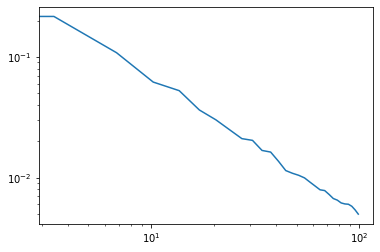

In [222]:
eps_list = []
tlist = np.linspace(0, T-1, 30)

for t in tlist: 
    eq = [np.mean(agent.play_history[:int(t+1)], axis=0) for agent in instance.agent_list]
    eps_list.append(game.approx_NE_quality(eq))

plt.loglog(tlist, eps_list)
plt.show()


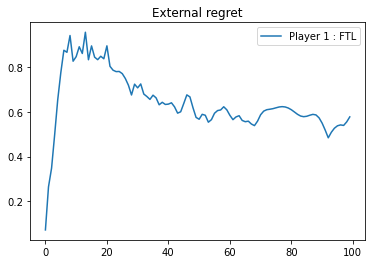

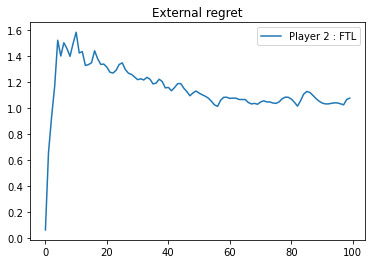

In [216]:
for agent in agent_list:
    plt.title("External regret")
    plt.plot(agent.ext_regret, label=agent.label)
    plt.legend()
    plt.show()

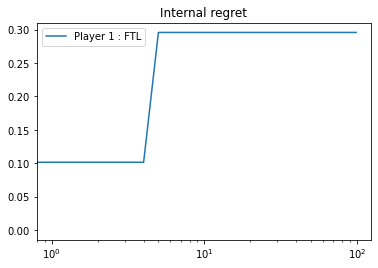

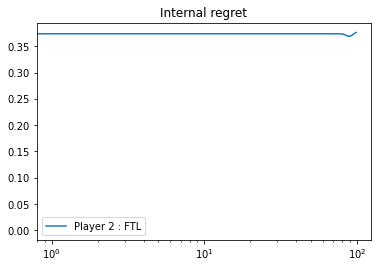

In [217]:
for agent in agent_list:
    plt.title("Internal regret")
    plt.plot(agent.int_regret, label=agent.label)
    plt.xscale("log")
    plt.legend()
    plt.show()

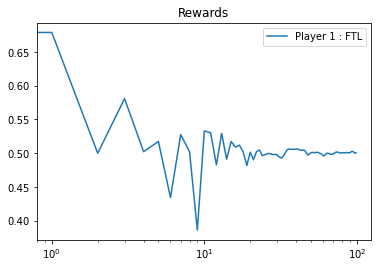

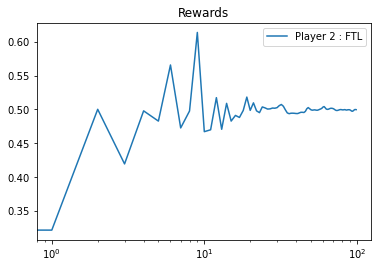

In [218]:
for agent in agent_list:
    plt.title("Rewards")
    t_slice = range(T)#range(min(agent.times_war)-100, max(agent.times_war) + 100)
    plt.plot(t_slice, np.array(agent.received_rewards)[t_slice], label=agent.label)
    plt.xscale('log')
    plt.legend()
    plt.show()

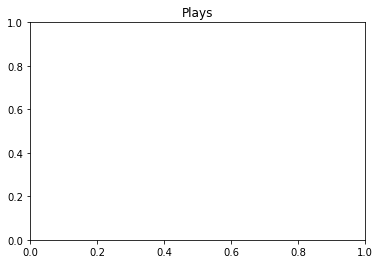

In [54]:
# For debugging
for agent in agent_list:
    plt.title("Plays")
    if agent.times_war:
        t_slice = range(min(agent.times_war)-100, max(agent.times_war) + 100)
        toplot = [agent.play_history[t][0] for t in t_slice ]
        plt.plot(t_slice, toplot, label=agent.label)
        plt.legend()
        plt.show()
        toplot = [agent.play_history[t][1] for t in t_slice ]
        plt.plot(t_slice, toplot, label=agent.label)
        plt.legend()
        plt.show()
        toplot = [agent.play_history[t][2] for t in t_slice ]
        plt.plot(t_slice, toplot, label=agent.label)
        plt.legend()
        plt.show()